<a href="https://colab.research.google.com/github/tejvirus0003/mypynb/blob/main/emailspammersvm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Link:
https://github.com/Shreyakkk/Email-Spam-Detector/blob/master/spam.csv
1.	Based on the dataset above, perform binary classification problem for email spam detection using Support Vector Machine (SVM) based machine Learning classification model.
2.	Check how performance varies with different types of Kernels
3.	Also check if the decision boundary changes with change in kernels

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Shreyakkk/Email-Spam-Detector/master/spam.csv')

In [3]:
len(df)

5572

In [4]:
df.isna().sum()
#no missing values :)

Label        0
EmailText    0
dtype: int64

In [5]:
for i in range(len(df)):
    if df['Label'][i] == 'ham':
        df['Label'][i] = 0
    else :
        df['Label'][i]= 1
#label encoding manually

In [6]:
df.head()

,Label,EmailText
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
uniquewords = set()
type(uniquewords)

set

In [8]:
for i in range(len(df)):
    email = df['EmailText'][i].split()
    for j in email:
        uniquewords.add(j)    

In [9]:
len(uniquewords)

15585

In [10]:
for i in uniquewords:
    df[i]=0

In [11]:
for i in range(len(df)):
    jk = df['EmailText'][i].split()
    for j in jk:
        df[j][i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
df.drop(['EmailText'] ,axis=1 ,inplace=True)

In [13]:
from sklearn.decomposition import PCA

In [73]:
pca = PCA(n_components=10)

In [74]:
df.head()

,Label,bak,toshiba...,two!,at,Content,U!,application,items,Oops,4403LDNW1A7RW18,olayiwola's,man...,2%,Ã¥Â£1.50perweeksub.,N-Gage,Rally,performed?,*exposes,length,cozy.,performance,Hogolo,mrng,"extra,",plans.,officially,02072069400.,\SHIT,Hurry,wer,watchng,"20,000",heater?,island,Fair,www.txt82228.com.,4)Press,V,insurance.,...,kettoda,08701213186.,Amrca,drugdealer,cheap,050703,ARE,you?,4U,running.lets,5),DEAD,senrd-dnot,0121,Wot,surely,nt?,"1st...""",Hols.,only!,"easy,",date.,Dont,spys,think.,"\POLYS\""",was,cash,speechless.,replied:,get,this,Second,one!!,SENT:),chances,blankets,Yeah,hesitation,ish!
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
X = df.drop(labels=['Label'] , axis=1)

In [76]:
X.head()

,bak,toshiba...,two!,at,Content,U!,application,items,Oops,4403LDNW1A7RW18,olayiwola's,man...,2%,Ã¥Â£1.50perweeksub.,N-Gage,Rally,performed?,*exposes,length,cozy.,performance,Hogolo,mrng,"extra,",plans.,officially,02072069400.,\SHIT,Hurry,wer,watchng,"20,000",heater?,island,Fair,www.txt82228.com.,4)Press,V,insurance.,fun...,...,kettoda,08701213186.,Amrca,drugdealer,cheap,050703,ARE,you?,4U,running.lets,5),DEAD,senrd-dnot,0121,Wot,surely,nt?,"1st...""",Hols.,only!,"easy,",date.,Dont,spys,think.,"\POLYS\""",was,cash,speechless.,replied:,get,this,Second,one!!,SENT:),chances,blankets,Yeah,hesitation,ish!
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
Y = df[['Label']]

In [78]:
Y.head()

,Label
0,0
1,0
2,1
3,0
4,0


In [79]:
X.to_numpy()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [80]:
X_ = pca.fit_transform(X)

In [81]:
lessdf = pd.DataFrame(X_)

In [82]:
lessdf

,0,1,2,3,4,5,6,7,8,9
0,-0.480973,0.044946,0.179402,0.186481,0.120665,0.285729,-0.656422,0.065414,0.539515,0.104932
1,-0.685699,-0.067720,0.128525,-0.074481,-0.040195,0.192829,-0.033941,-0.111047,-0.182093,0.045303
2,0.359093,-0.978659,0.229191,0.113987,-0.617837,0.186558,-0.901138,-0.004545,0.553207,0.242791
3,-0.629504,-0.016556,0.106309,-0.052525,-0.066356,0.123786,0.025035,-0.062650,-0.161258,0.020105
4,0.211723,0.164066,0.159126,-0.916500,-0.415126,-0.448132,-0.190964,0.162920,-0.039637,-0.149716
...,...,...,...,...,...,...,...,...,...,...
5567,-0.041035,-0.604094,0.473397,0.728094,0.376271,-0.351140,0.426312,0.650780,-0.792226,0.681933
5568,-0.129484,-0.566712,-0.158886,-0.636226,-0.025574,-0.041198,-0.193032,0.030675,-0.055783,-0.158906
5569,-0.338506,0.057612,0.124916,0.222885,0.262863,0.051476,-0.288438,-0.103212,0.882087,0.472096
5570,0.986443,0.303414,0.605474,-0.676543,0.125780,0.031662,-0.122652,-0.029259,1.383812,-0.006203


In [83]:
lessdf.corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,2.493293e-17,-6.227849e-17,-4.126418e-17,2.547776e-17,-3.152133e-17,1.052141e-17,-4.670211e-17,-2.387352e-17,-2.885983e-17
1,2.493293e-17,1.000000e+00,3.569138e-16,-6.345970e-17,-1.774210e-17,2.214204e-16,-1.355723e-16,-8.672999e-17,-1.942760e-17,-4.821566e-17
2,-6.227849e-17,3.569138e-16,1.000000e+00,-2.146150e-17,-1.354352e-17,5.715211e-17,-1.241068e-16,1.651716e-16,-2.352369e-16,3.780621e-17
3,-4.126418e-17,-6.345970e-17,-2.146150e-17,1.000000e+00,-2.440758e-16,4.073780e-16,3.252821e-17,1.787955e-16,-2.197659e-16,1.887323e-16
4,2.547776e-17,-1.774210e-17,-1.354352e-17,-2.440758e-16,1.000000e+00,-4.680492e-16,-2.586419e-16,1.046385e-16,-4.078966e-17,-5.816685e-17
5,-3.152133e-17,2.214204e-16,5.715211e-17,4.073780e-16,-4.680492e-16,1.000000e+00,-1.691559e-17,-7.625405e-16,6.283873e-16,-2.524866e-18
6,1.052141e-17,-1.355723e-16,-1.241068e-16,3.252821e-17,-2.586419e-16,-1.691559e-17,1.000000e+00,8.483109e-17,-3.984868e-16,-1.036742e-16
7,-4.670211e-17,-8.672999e-17,1.651716e-16,1.787955e-16,1.046385e-16,-7.625405e-16,8.483109e-17,1.000000e+00,-5.718653e-16,-1.986443e-16
8,-2.387352e-17,-1.942760e-17,-2.352369e-16,-2.197659e-16,-4.078966e-17,6.283873e-16,-3.984868e-16,-5.718653e-16,1.000000e+00,-6.801638e-16
9,-2.885983e-17,-4.821566e-17,3.780621e-17,1.887323e-16,-5.816685e-17,-2.524866e-18,-1.036742e-16,-1.986443e-16,-6.801638e-16,1.000000e+00


In [84]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_, Y, test_size=0.3, random_state=0)

In [85]:
len(X_train) , len(X_test)

(3900, 1672)

In [86]:
from sklearn.svm import SVC

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
parameters = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf' , 'poly' , 'linear']} 

In [89]:
classifier = RandomizedSearchCV(SVC() , param_distributions=parameters , n_iter=5 , n_jobs=-1 , cv=10 ,verbose=3 )

In [90]:
Y = Y.astype(int)

In [91]:
classifier.fit(X_ , Y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'poly', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=3)

In [92]:
classifier.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'poly', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=3)>

In [93]:
classifier.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [94]:
## POLY WON 
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [95]:
classifier = SVC(kernel='linear')
classifier.fit(X_train , y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [96]:
classifier.score(X_test , y_test)

0.9294258373205742

In [97]:

#now lets change kernel one by one and see the accuracy but before that lets build the confusion matrix of above


In [98]:


y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report , confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

classification_report(y_test , y_pred)


'              precision    recall  f1-score   support\n\n           0       0.94      0.98      0.96      1434\n           1       0.85      0.61      0.71       238\n\n    accuracy                           0.93      1672\n   macro avg       0.90      0.80      0.84      1672\nweighted avg       0.93      0.93      0.92      1672\n'

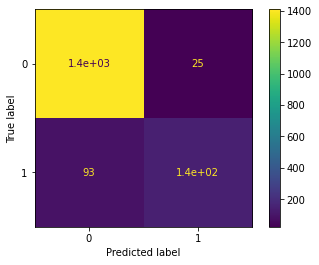

In [99]:


cum = confusion_matrix(y_test , y_pred)
matrix = ConfusionMatrixDisplay(cum , display_labels=classifier.classes_)
matrix.plot()


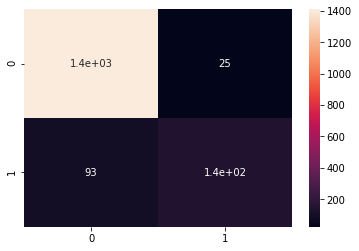

In [100]:

import seaborn as sn


sn.heatmap(cum , annot=True)



**Changing Kernels**

Types of kernels are : <br>
Linear kernel (already done) <br>
Polynomial Kernel ( poly ) <br>
Gaussian Kernel <br>
sigmoid kernel <br>


In [101]:

model2 = SVC(kernel='poly')
model2.fit(X_train , y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [102]:

model2.score(X_test , y_test)


0.9366028708133971

In [103]:
model3 = SVC(kernel='rbf')
model3.fit(X_train , y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [104]:

model3.score(X_test , y_test)


0.9425837320574163

In [105]:
model4 = SVC(kernel='sigmoid')
model4.fit(X_train , y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [106]:

model4.score(X_test , y_test)


0.8648325358851675

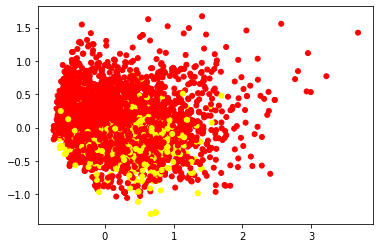

In [107]:
#plotting the features
y_train = y_train.astype(int)
import matplotlib.pyplot as plt
plt.scatter(X_[:,0], X_[:,5], c=Y.to_numpy(), s=25, cmap='autumn')

In [108]:
X_[:,0]

array([-0.48097292, -0.68569898,  0.35909322, ..., -0.33850623,
        0.98644304, -0.09197297])

In [109]:
Y.to_numpy()

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

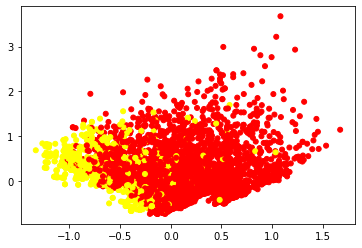

In [114]:
plt.scatter(X_[:,1], X_[:,0], c=Y.to_numpy(), s=25, cmap='autumn')

In [115]:
X_train

array([[-0.60908575, -0.13948767, -0.15805838, ..., -0.08098617,
         0.03250084,  0.01981688],
       [ 0.22631502, -0.2054361 , -0.87899762, ...,  0.18382946,
        -0.16132453, -0.05310011],
       [ 0.17496928, -0.59404146, -0.10451901, ...,  0.12073939,
         0.20254845,  0.18286295],
       ...,
       [ 0.21315431,  0.63700711,  0.84872742, ..., -0.42783304,
        -0.48680479,  0.1973464 ],
       [-0.08291143, -0.15045904,  0.13259537, ..., -0.32048758,
        -0.3753745 , -0.1035441 ],
       [ 0.60892259,  0.51330408, -0.52557583, ...,  0.01032429,
        -0.47178643,  0.21544954]])

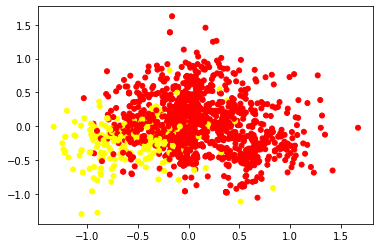

In [118]:
plt.scatter(X_test[:,1], X_test[:,5], c=y_test.to_numpy(), s=25, cmap='autumn')